<a href="https://colab.research.google.com/github/MelAGndy/master/blob/master/Churn_employee_salary_turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#CHURN: The Employee Turnover Conundrum
###*Developing a strategic plan for retention*


---
---

   Discovering the underlying issues
   >Pattern identification using:

    *   Decision Trees
    *   Random Forests


Details as of import 2/26/2024
---
---
**(data is already clean)*
# *   14,999 Employees sampled
>Salary rates classified as:
>>*   low:  7,316
>>*   medium:  6,446
>>*   high:  1,237

# Imports

In [ ]:
# !pip install -U pandas-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension

In [ ]:
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import pandas_profiling
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg


plt.style.use("ggplot")
warnings.simplefilter("ignore")
%matplotlib inline

In [ ]:
employee_eval = pd.read_csv('churn_conundrum_employees.csv')

In [ ]:
employee_eval.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
employee_eval.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'quit',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [ ]:
plt.rcParams['figure.figsize'] = (12,8)

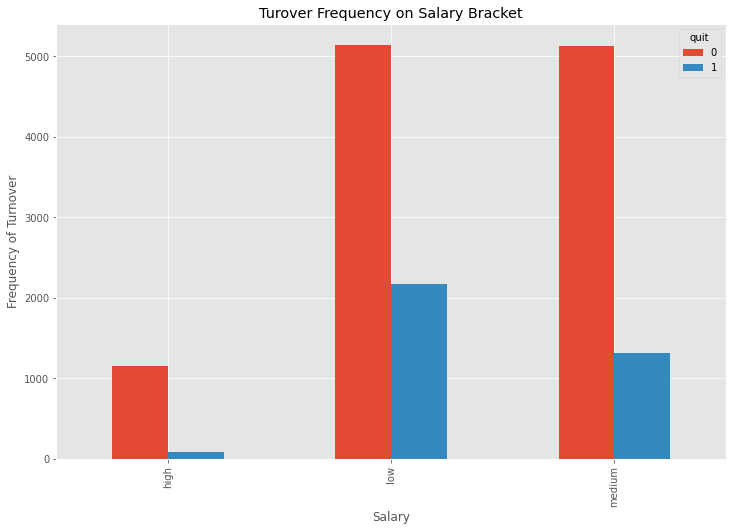

In [ ]:
pd.crosstab(employee_eval.salary, employee_eval.quit).plot(kind='bar')
plt.title('Turover Frequency on Salary Bracket')
plt.xlabel('Salary')
plt.ylabel('Frequency of Turnover')
plt.show()

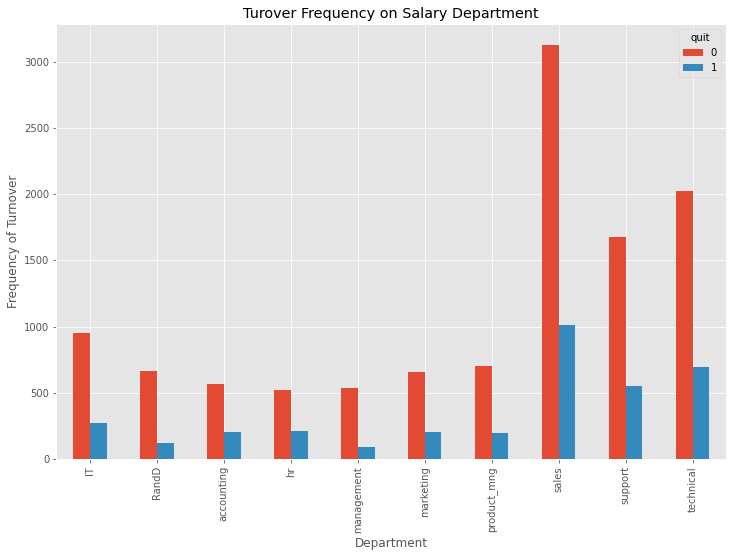

In [ ]:
pd.crosstab(employee_eval.department, employee_eval.quit).plot(kind='bar')
plt.title('Turover Frequency on Salary Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.show()

categorizing the variables.

In [ ]:
cat_vars = ['department', 'salary']
for var in cat_vars:
  cat_list = pd.get_dummies(employee_eval[var], prefix=var)
  employee_eval = employee_eval.join(cat_list)

In [ ]:
employee_eval.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
employee_eval.drop(columns = ['department', 'salary'], axis = 1, inplace = True)

In [ ]:
from yellowbrick.target import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (10,6)

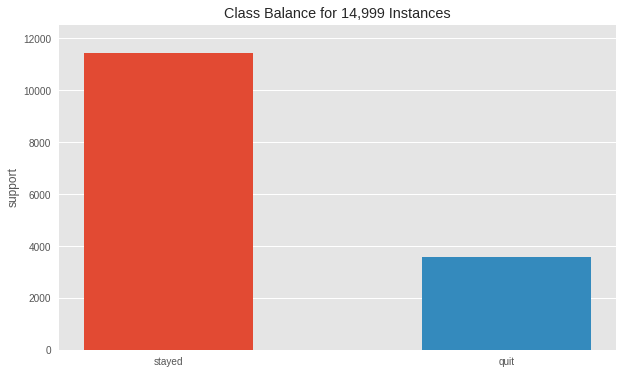

In [ ]:
visualizer = ClassBalance(labels=['stayed', 'quit'])
visualizer.fit(employee_eval.quit)
visualizer.show()

In [ ]:
X = employee_eval.loc[:, employee_eval.columns != 'quit']
y = employee_eval.quit

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2, stratify = y)

## Build an Interactive Decision Tree Classifier

Supervised learning:
- The inputs are random variables $X = X_1, ..., X_p$;
- The output is a random variable $Y.$


- Data is a finite set $$\mathbb{L}=\{(x_i,y_i)|i=0, ..., N-1\}$$
where $x_i \in X = X_1 \times ... \times X_p$ and $y_i \in y$ are randomly drawn from $P_{X,Y}.$

E.g., $(x_i,y_i)=((\text{salary = low, department = sales, ...}),\text{quit = 1})$

- The goal is to find a model $\varphi_\mathbb{L}: X \mapsto y$ minimizing $$\text{Err}(\varphi_\mathbb{L}) = \mathbb{E}_{X,Y}\{L(Y, \varphi_\mathbb{L}(X))\}.$$


About:

 - Decision trees are non-parametric models which can model arbitrarily complex relations between inputs and outputs, without any a priori assumption

- Decision trees handle numeric and categorical variables

- They implement feature selection, making them robust to noisy features (to an extent)

- Robust to outliers or errors in labels

- Easily interpretable by even non-ML practioners.


#### Decision trees: partitioning the feature space:

- Decision trees generally have low bias but have high variance.

In [ ]:
@interact
def plot_tree(crit=['gini', 'entropy'],
              split=['best', 'random'],
              depth=IntSlider(min=1,max=30,value=2, continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):

  estimator = DecisionTreeClassifier(random_state=0, criterion=crit, splitter=split, max_depth=depth,
                                     min_samples_split = min_split,  min_samples_leaf = min_leaf)

  estimator.fit(X_train, y_train)
  print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
  print('Decision Tree Test Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))

  graph = Source(tree.export_graphviz(estimator, out_file=None, feature_names=X_train.columns,
                                      class_names = ['stayed', 'quit'], filled = True))

  display(Image(employee_eval = graph.pipe(format='png')))

  return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

## Build an Interactive Random Forest Classifier

Although randomization increases bias, it is possible to get a reduction in variance of the ensemble. Random forests are one of the most robust machine learning algorithms for a variety of problems.

- Randomization and averaging lead to a reduction in variance and improve accuracy
- The implementations are parallelizable
- Memory consumption and training time can be reduced by bootstrapping
- Sampling features and not solely sampling examples is crucial to improving accuracy

In [ ]:
@interact
def plot_tree_rf(crit=['gini', 'entropy'],
                 bootstrap=['True', 'False'],
                 depth=IntSlider(min=1,max=30,value=3, continuous_update=False),
                 forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):

  estimator = RandomForestClassifier(random_state=1, criterion=crit, bootstrap=bootstrap,
                                     n_estimators=forests, max_depth=depth,
                                     min_samples_split = min_split,
                                     min_samples_leaf = min_leaf,
                                     n_jobs= -1, verbose = False)
  estimator.fit(X_train, y_train)

  print('Random Forests Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
  print('Random Forests Test Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))
  num_tree = estimator.estimators_[0]
  print('\Visualizing Tree: ', 0)


  graph = Source(tree.export_graphviz(num_tree, out_file = None, feature_names = X_train.columns,
                                      class_names = ['stayed', 'quit'], filled = True))

  display(Image(employee_eval = graph.pipe(format='png')))
  return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

## Feature Importance and Evaluation Metrics

In [ ]:
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize'] = (16,12)
plt.style.use("ggplot")

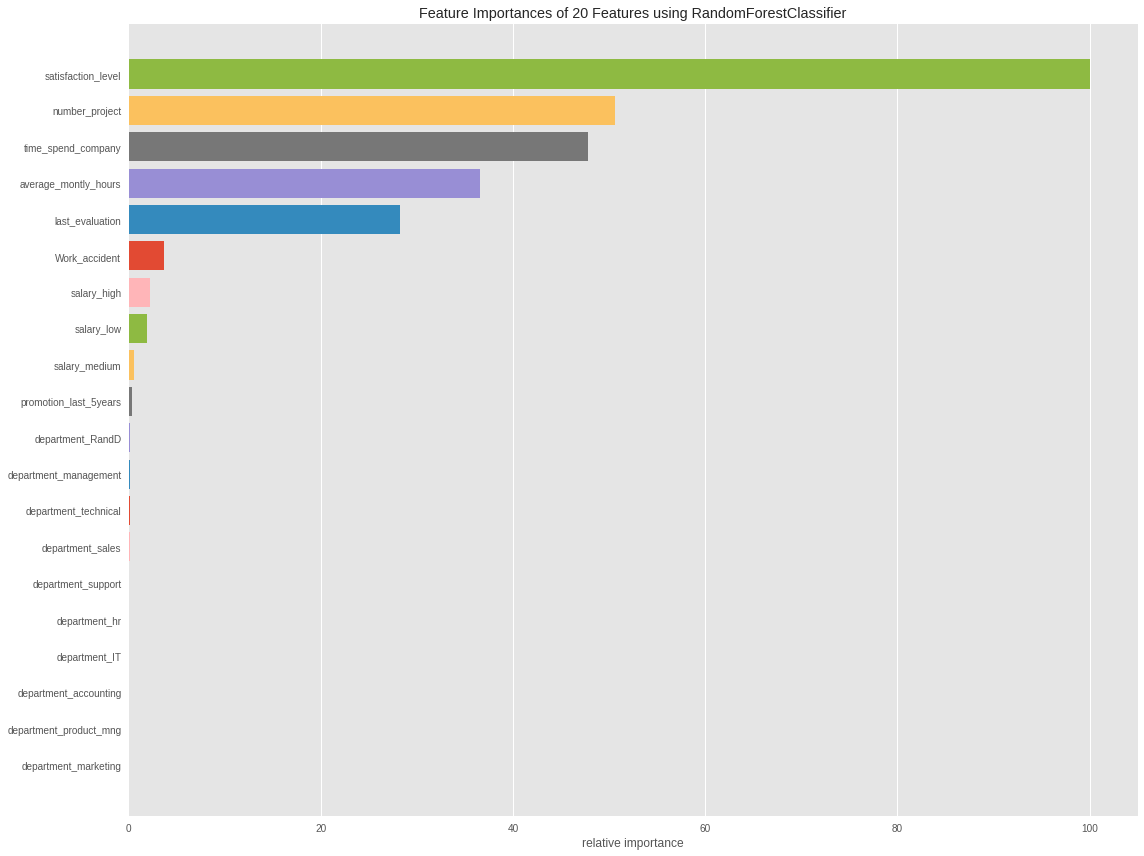

In [ ]:
rf = RandomForestClassifier(bootstrap='True', ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1,
                       warm_start=False)

viz = FeatureImportances(rf)
viz.fit(X_train, y_train)
viz.show(outpath="1.png")

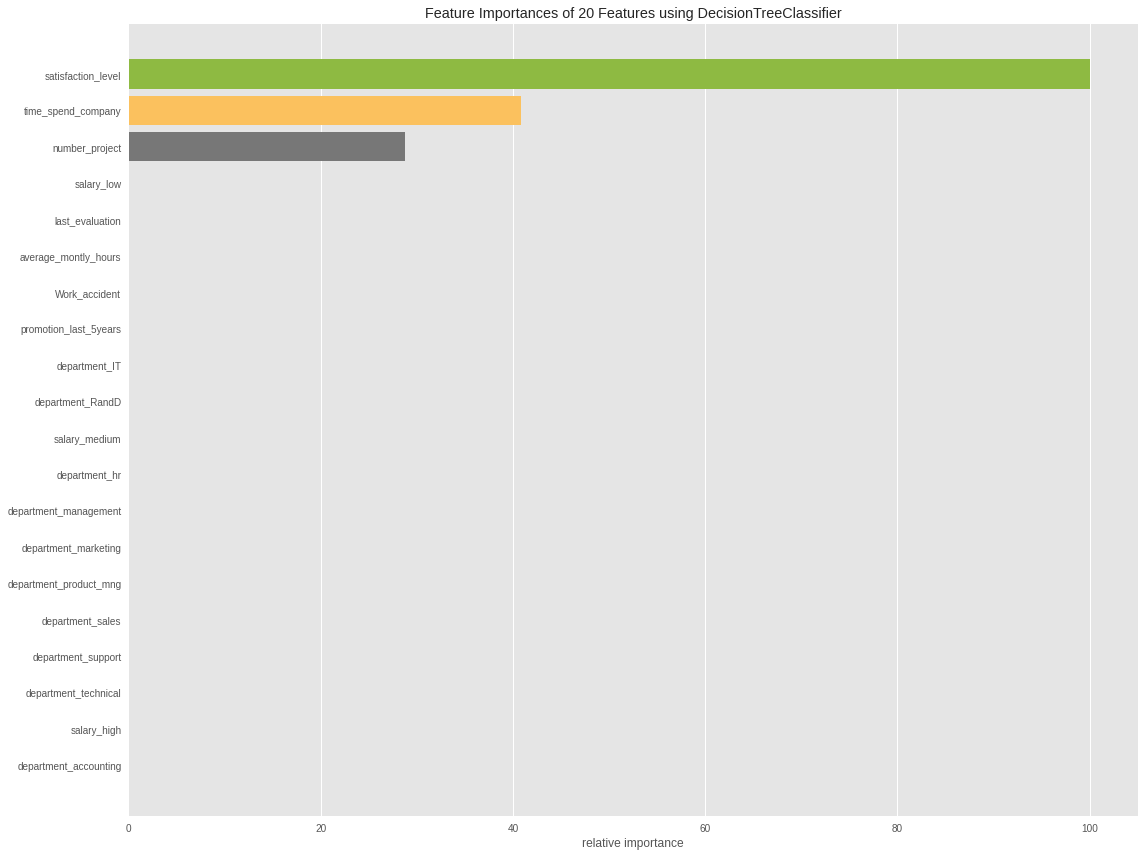

In [ ]:
dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=0, splitter='best')

viz = FeatureImportances(dt)
viz.fit(X_train, y_train)
viz.show()